Phakamon Komanan 1923510034

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/kanchanaburi_pm25.csv')
data

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,65.2,1,0
1,2016,3,3,9,65.2,1,0
2,2016,3,3,10,64.9,1,0
3,2016,3,3,11,64.9,1,0
4,2016,3,3,12,38.4,1,0
...,...,...,...,...,...,...,...
23803,2019,2,7,5,35.0,45,0
23804,2019,2,7,6,35.0,45,0
23805,2019,2,7,7,42.0,56,0
23806,2019,2,7,8,47.0,64,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23808 entries, 0 to 23807
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           23808 non-null  int64  
 1   Month          23808 non-null  int64  
 2   Day            23808 non-null  int64  
 3   UTC Hour       23808 non-null  int64  
 4   PM2.5          23808 non-null  float64
 5   PM10_mask      23808 non-null  int64  
 6   Retrospective  23808 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.3 MB


In [4]:
data.isnull().sum()

Year             0
Month            0
Day              0
UTC Hour         0
PM2.5            0
PM10_mask        0
Retrospective    0
dtype: int64

In [5]:
data['Retrospective'].value_counts()

0    23808
Name: Retrospective, dtype: int64

In [6]:
data = data.rename(columns={'UTC Hour': 'Hour'})
data

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,65.2,1,0
1,2016,3,3,9,65.2,1,0
2,2016,3,3,10,64.9,1,0
3,2016,3,3,11,64.9,1,0
4,2016,3,3,12,38.4,1,0
...,...,...,...,...,...,...,...
23803,2019,2,7,5,35.0,45,0
23804,2019,2,7,6,35.0,45,0
23805,2019,2,7,7,42.0,56,0
23806,2019,2,7,8,47.0,64,0


In [7]:
data['datetime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7)

Visualization

C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:title={'center':'Hour'}>,
        <AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'PM10_mask'}>],
       [<AxesSubplot:title={'center':'Retrospective'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

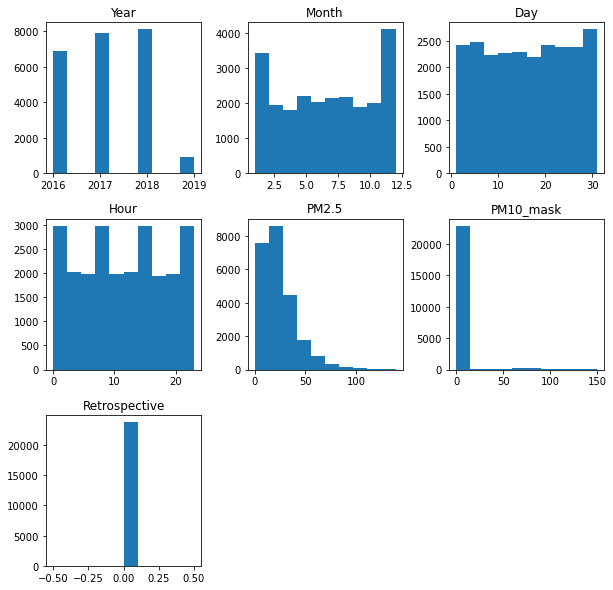

In [8]:
data.hist(bins=10,figsize=(10,10),grid=False)

<AxesSubplot:>

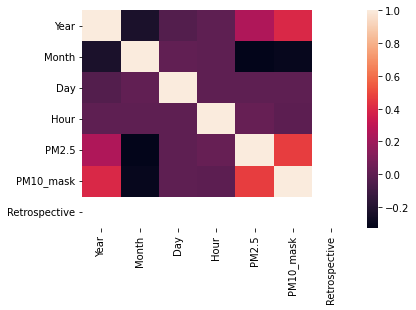

In [9]:
sns.heatmap(data.corr())

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

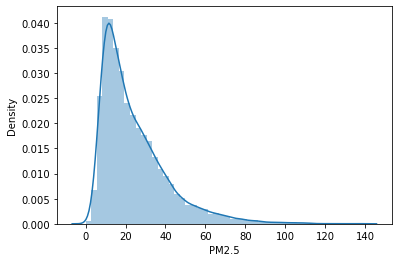

In [10]:
sns.distplot(data['PM2.5'])

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM10_mask', ylabel='Density'>

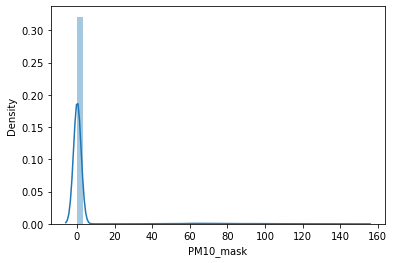

In [11]:
sns.distplot(data['PM10_mask'])

In [12]:
df = data.drop(columns=['Hour','Retrospective'])
df

,Year,Month,Day,PM2.5,PM10_mask,datetime
0,2016,3,3,65.2,1,2016-03-03 15:00:00
1,2016,3,3,65.2,1,2016-03-03 16:00:00
2,2016,3,3,64.9,1,2016-03-03 17:00:00
3,2016,3,3,64.9,1,2016-03-03 18:00:00
4,2016,3,3,38.4,1,2016-03-03 19:00:00
...,...,...,...,...,...,...
23803,2019,2,7,35.0,45,2019-02-07 12:00:00
23804,2019,2,7,35.0,45,2019-02-07 13:00:00
23805,2019,2,7,42.0,56,2019-02-07 14:00:00
23806,2019,2,7,47.0,64,2019-02-07 15:00:00


<AxesSubplot:>

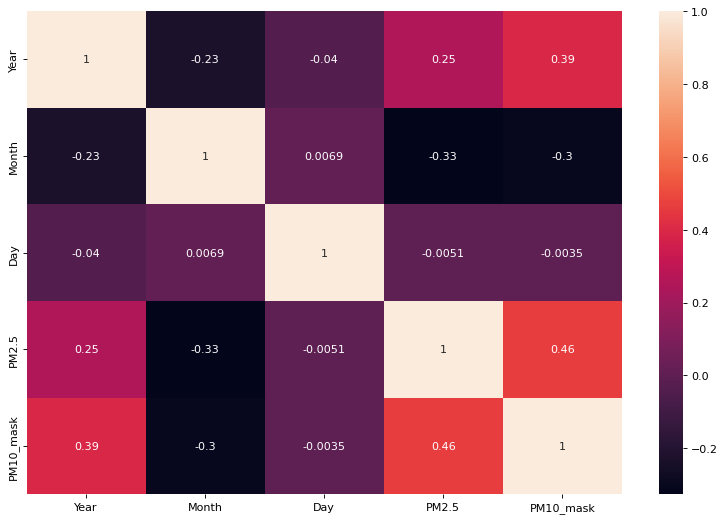

In [13]:
plt.figure(figsize=(12, 8), dpi=80)
sns.heatmap(df.corr(), annot = True)

In [14]:
month = range(1,13)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


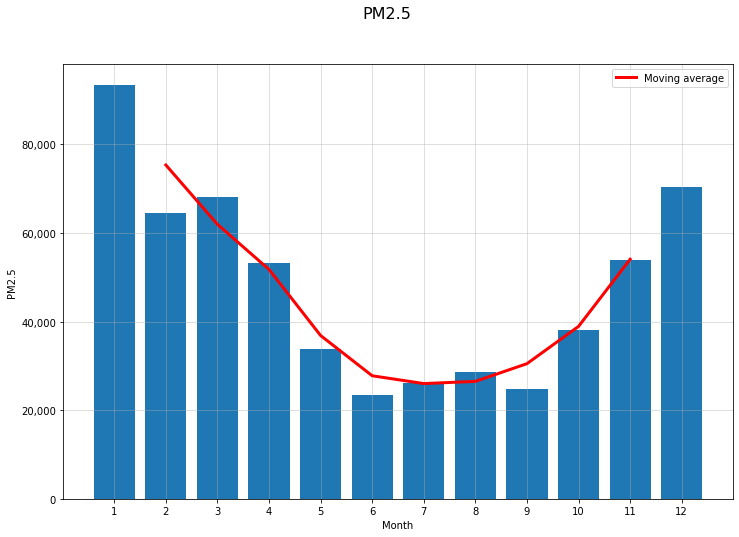

In [15]:
dat = df.groupby(['Month'])['PM2.5'].sum()
ma = dat.rolling(window = 3, center=True).mean()
plt.figure(figsize=(12,8))
plt.bar(month, dat)
plt.plot(ma, c='r', linewidth=3, label='Moving average')
plt.ylabel('PM2.5')
plt.xlabel('Month')
plt.grid(alpha=0.5)
plt.legend()
plt.xticks(month)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.suptitle('PM2.5', fontsize=16)
plt.show()

In [16]:
dat

Month
1     93509.1
2     64460.9
3     68111.1
4     53325.4
5     33882.2
6     23378.9
7     26075.0
8     28588.1
9     24873.1
10    38073.6
11    53826.8
12    70369.3
Name: PM2.5, dtype: float64

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


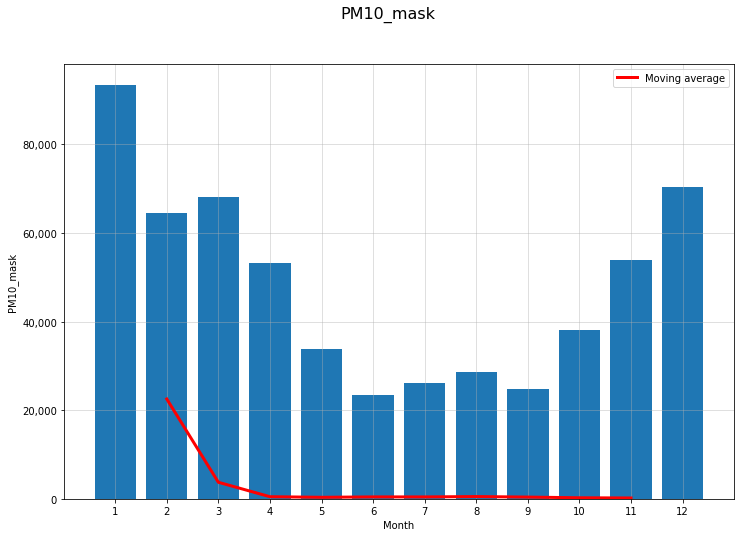

In [17]:
dat1 = df.groupby(['Month'])['PM10_mask'].sum()
ma = dat1.rolling(window = 3, center=True).mean()
plt.figure(figsize=(12,8))
plt.bar(month, dat)
plt.plot(ma, c='r', linewidth=3, label='Moving average')
plt.ylabel('PM10_mask')
plt.xlabel('Month')
plt.grid(alpha=0.5)
plt.legend()
plt.xticks(month)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.suptitle('PM10_mask', fontsize=16)
plt.show()

In [18]:
dat1

Month
1     56636
2     10368
3       601
4       231
5       585
6       202
7       499
8       568
9       447
10      154
11       86
12      312
Name: PM10_mask, dtype: int64

PM2.5

In [19]:
from sklearn.linear_model import LinearRegression

X = np.arange(1, 13).reshape(-1,1)
y = dat.values

linear = LinearRegression().fit(X, y)
print('model acc =', linear.score(X, y))

X_fit = np.arange(1, 16).reshape(-1,1)
y_linear = linear.predict(X_fit)
print(y_linear)

model acc = 0.159878954871163
[61974.48846154 59471.14965035 56967.81083916 54464.47202797
 51961.13321678 49457.79440559 46954.45559441 44451.11678322
 41947.77797203 39444.43916084 36941.10034965 34437.76153846
 31934.42272727 29431.08391608 26927.7451049 ]


In [20]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2, include_bias=False)

X_ = transformer.fit_transform(X)

poly = LinearRegression().fit(X_, y)
print('model acc =', poly.score(X_, y))

X_fit_ = transformer.fit_transform(X_fit)
y_poly = poly.predict(X_fit_)
print(y_poly)

model acc = 0.930859231128626
[ 94963.45137363  74466.13279221  57567.61016484  44267.88349151
  34566.95277223  28464.81800699  25961.4791958   27056.93633866
  31751.18943556  40044.23848651  51936.08349151  67426.72445055
  86516.16136364 109204.39423077 135491.42305195]


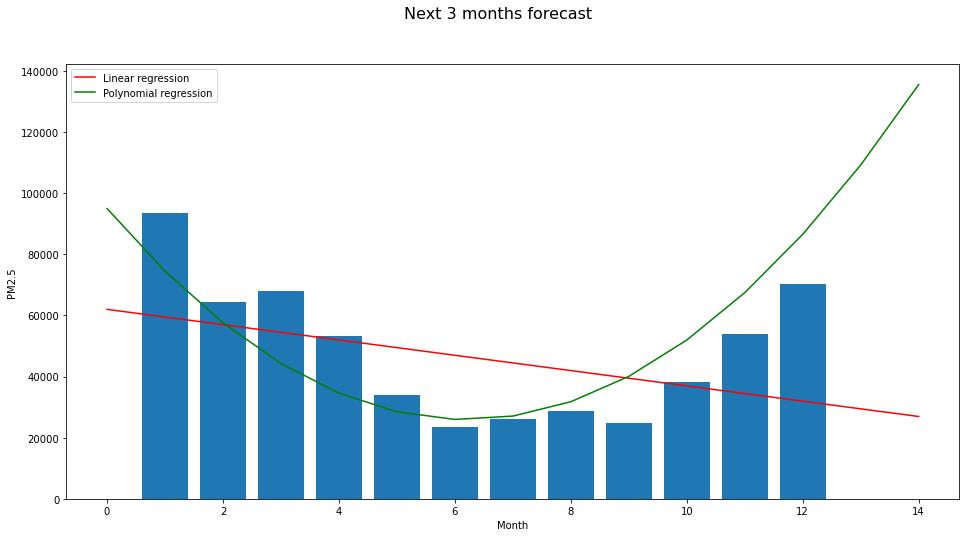

In [21]:
#This graph show about next 3 months forecast
from matplotlib.pylab import rcParams
rcParams = 20,10
#Plot the actual data
plt.figure(figsize=(16,8))
plt.bar(dat.index, dat.values)
#Plot the regression model
plt.plot(y_linear, color='r', label='Linear regression')
#Plot the future predictions
plt.plot(y_poly, color='g', label='Polynomial regression')
#Set the title of the graph
plt.suptitle('Next 3 months forecast', fontsize=16)
plt.ylabel('PM2.5')
plt.xlabel('Month')
plt.legend()
#display the graph
plt.show()

PM10_mask

In [22]:
from sklearn.linear_model import LinearRegression

X = np.arange(1, 13).reshape(-1,1)
y = dat1.values

linear = LinearRegression().fit(X, y)
print('model acc =', linear.score(X, y))

X_fit = np.arange(1, 16).reshape(-1,1)
y_linear = linear.predict(X_fit)
print(y_linear)

model acc = 0.3072021145461047
[ 19619.69230769  17123.52097902  14627.34965035  12131.17832168
   9635.00699301   7138.83566434   4642.66433566   2146.49300699
   -349.67832168  -2845.84965035  -5342.02097902  -7838.19230769
 -10334.36363636 -12830.53496503 -15326.70629371]


In [23]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2, include_bias=False)

X_ = transformer.fit_transform(X)

poly = LinearRegression().fit(X_, y)
print('model acc =', poly.score(X_, y))

X_fit_ = transformer.fit_transform(X_fit)
y_poly = poly.predict(X_fit_)
print(y_poly)

model acc = 0.6244810679838623
[34842.89285714 24043.15759241 14904.13511489  7425.82542458
  1608.22852148 -2548.65559441 -5044.82692308 -5880.28546454
 -5055.03121878 -2569.06418581  1577.61563437  7385.00824176
 14853.11363636 23981.93181818 34771.46278721]


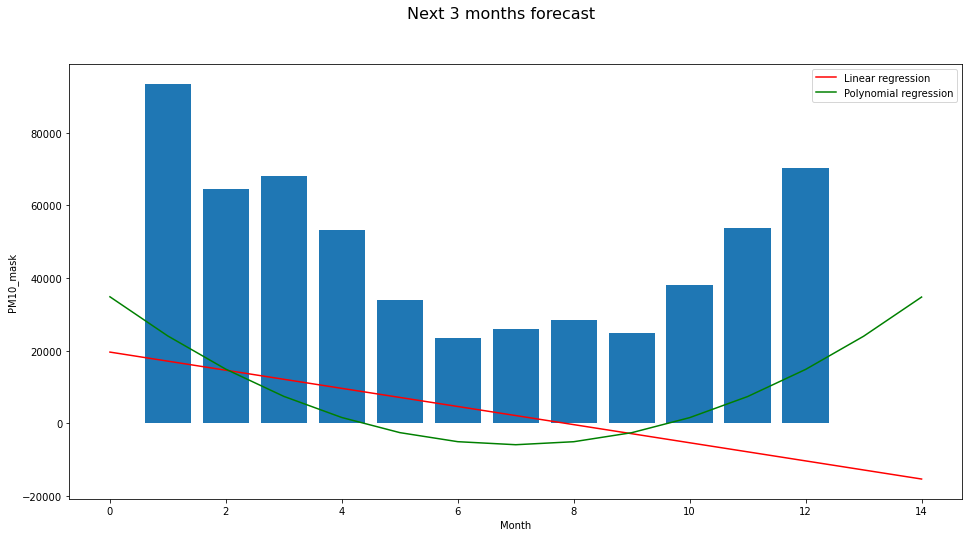

In [24]:
#This graph show about next 3 months forecast
from matplotlib.pylab import rcParams
rcParams = 20,10
#Plot the actual data
plt.figure(figsize=(16,8))
plt.bar(dat.index, dat.values)
#Plot the regression model
plt.plot(y_linear, color='r', label='Linear regression')
#Plot the future predictions
plt.plot(y_poly, color='g', label='Polynomial regression')
#Set the title of the graph
plt.suptitle('Next 3 months forecast', fontsize=16)
plt.ylabel('PM10_mask')
plt.xlabel('Month')
plt.legend()
#display the graph
plt.show()

In [25]:
df.describe()

,Year,Month,Day,PM2.5,PM10_mask
count,23808.000000,23808.000000,23808.000000,23808.000000,23808.000000
mean,2017.126260,6.646757,15.737105,24.297442,2.969128
std,0.875125,3.405100,8.882584,16.734309,14.955765
min,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,2016.000000,4.000000,8.000000,12.100000,0.000000
50%,2017.000000,7.000000,16.000000,19.400000,0.000000
75%,2018.000000,10.000000,23.000000,31.800000,0.000000
max,2019.000000,12.000000,31.000000,138.900000,150.000000


In [26]:
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [27]:
X = df.drop(['Year','Month','Day','datetime'], axis=1)
y = df['Day']

In [28]:
model = LinearRegression().fit(X,y)

In [29]:
r_sq = model.score(X,y)
print('Model Score (coeddicient of determinatoin) : ' + str(r_sq))

Model Score (coeddicient of determinatoin) : 2.770434993837334e-05


In [30]:
y

0        3
1        3
2        3
3        3
4        3
        ..
23803    7
23804    7
23805    7
23806    7
23807    7
Name: Day, Length: 23808, dtype: int64

In [31]:
y_pred = model.predict(X)
print('predicted respone : ',y_pred,sep='\n')

predicted respone : 
[15.64149668 15.64149668 15.64220977 ... 15.65148922 15.63303644
 15.63148043]


In [32]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                    Day   R-squared (uncentered):                   0.533
Model:                            OLS   Adj. R-squared (uncentered):              0.533
Method:                 Least Squares   F-statistic:                          1.360e+04
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:12:55   Log-Likelihood:                         -93617.
No. Observations:               23808   AIC:                                  1.872e+05
Df Residuals:                   23806   BIC:                                  1.873e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [34]:
df['Hour'] = df['datetime'].dt.hour
data.head(5)

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
0,2016,3,3,8,65.2,1,0,2016-03-03 15:00:00
1,2016,3,3,9,65.2,1,0,2016-03-03 16:00:00
2,2016,3,3,10,64.9,1,0,2016-03-03 17:00:00
3,2016,3,3,11,64.9,1,0,2016-03-03 18:00:00
4,2016,3,3,12,38.4,1,0,2016-03-03 19:00:00


In [35]:
df.groupby('Hour')['Hour'].count()

Hour
0      955
1      981
2     1016
3      970
4      988
5     1023
6      967
7      987
8     1020
9      971
10     998
11    1027
12     977
13     996
14    1002
15     969
16     997
17    1020
18     966
19     996
20    1020
21     974
22     977
23    1011
Name: Hour, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


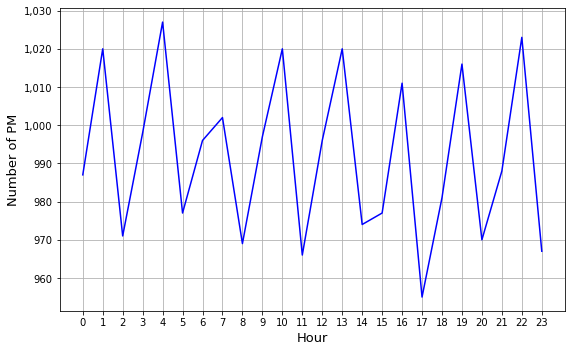

In [36]:
fig , ax = plt.subplots(figsize=(8,5))
hours = [hour for hour, df in data.groupby('Hour')]
plt.plot(hours,data.groupby('Hour')['Hour'].count(),color='b')
plt.xlabel('Hour', fontsize = 13)
plt.xticks(hours)
plt.ylabel('Number of PM', fontsize = 13)
plt.grid()
plt.tight_layout()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = df[['PM2.5','PM10_mask']].values
y = df['Month'].values
model = LinearRegression().fit(X,y)

In [38]:
x1 = X[:, 0]
x2 = X[:, 1]
z = y


x_pred = np.linspace(0, 40, 100)   # range of porosity values
y_pred = np.linspace(0, 180, 100)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T



ols = LinearRegression()
model = ols.fit(X, y)
predicted = model.predict(model_viz)
r2 = model.score(X,y)

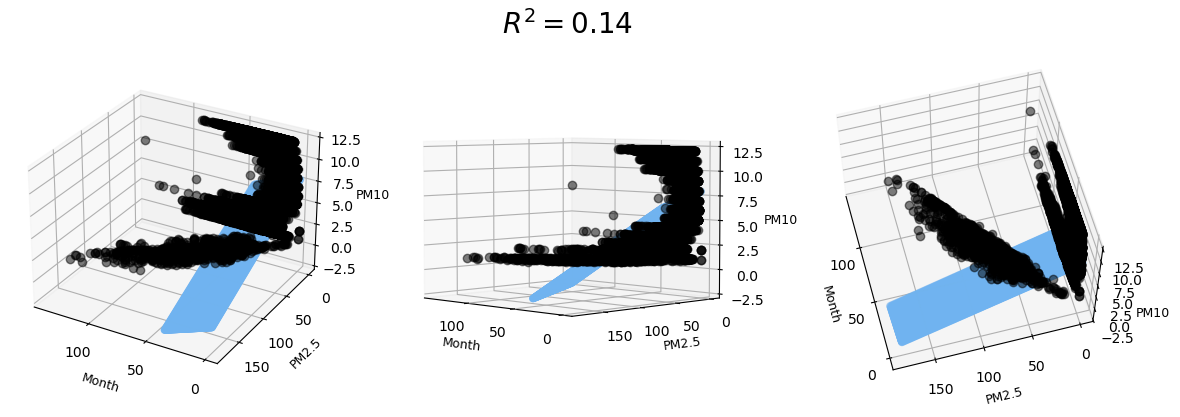

In [39]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x1, x2, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Month', fontsize=9)
    ax.set_ylabel('PM2.5', fontsize=9)
    ax.set_zlabel('PM10', fontsize=9)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=135)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()